# Climate Change Awarness Project

## Earth is Perilously close to a global warming threshold

#### Recent developments highlight significant shifts in U.S. environmental policy and global climate trentempanamoly:

### EPA's Reconsideration of the Endangerment Finding

#### The U.S. Environmental Protection Agency (EPA) has announced plans to reassess the 2009 "Endangerment Finding," a pivotal determination that classified greenhouse gases as harmful to public health and welfare. This finding has been the foundation for numerous climate-related regulations over the past decade and a half. EPA Administrator Lee Zeldin stated that, after 16 years, the agency will formally reconsider this finding, potentially impacting regulations on emissions from vehicles, power plants, and other sources. 

## Global Temperatures Surpassing the 1.5°C Threshold

#### Concurrently, the World Meteorological Organization (WMO) confirmed that 2024 was the warmest year on record, with global average temperatures approximately 1.55°C above pre-industrial levels. This marks the first time the 1.5°C threshold—a critical limit identified in international climate agreements—has been exceeded for an entire year. 

## Implications of These Developments

#### The EPA's decision to revisit the Endangerment Finding could lead to significant changes in U.S. climate policy, potentially altering regulations aimed at reducing greenhouse gas emissions. This move has garnered both support from industry groups, who argue it could boost energy production, and criticism from environmental organizations concerned about public health and environmental protection. 

#### The unprecedented rise in global temperatures underscores the urgency of addressing climate change. Surpassing the 1.5°C threshold intensifies the focus on international efforts to mitigate climate impacts and adapt to a rapidly changing environment. 

### The goal is to analyze the global warming crisis—how it has been escalating since temperature recortempanamoly first began. Despite ongoing skepticism about climate change, this analysis provides undeniable evidence of its alarming progression.

In [ ]:
import xarray as xr
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from scipy.spatial import cKDTree
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

warnings.filterwarnings("ignore")

tempanamoly = xr.open_dataset('Dataset/climatechange.nc').tempanomaly
# tempanamoly =tempanamoly[:20]

It is an xarray. Usually xarray contains complex data. We can store multi dimensional data using xarray. <br> Here we have 3 coordinates.
They are Latitude, longitude and time. We have tempanomaly corresponding to these coordinates.

# EDA

### Comparision of old three years and current year - Global Temperature

!Info: We should flattent the axes before iterating. Because axes are 2d array. We can't iterate through 2d array, thats why we should flatten axes.

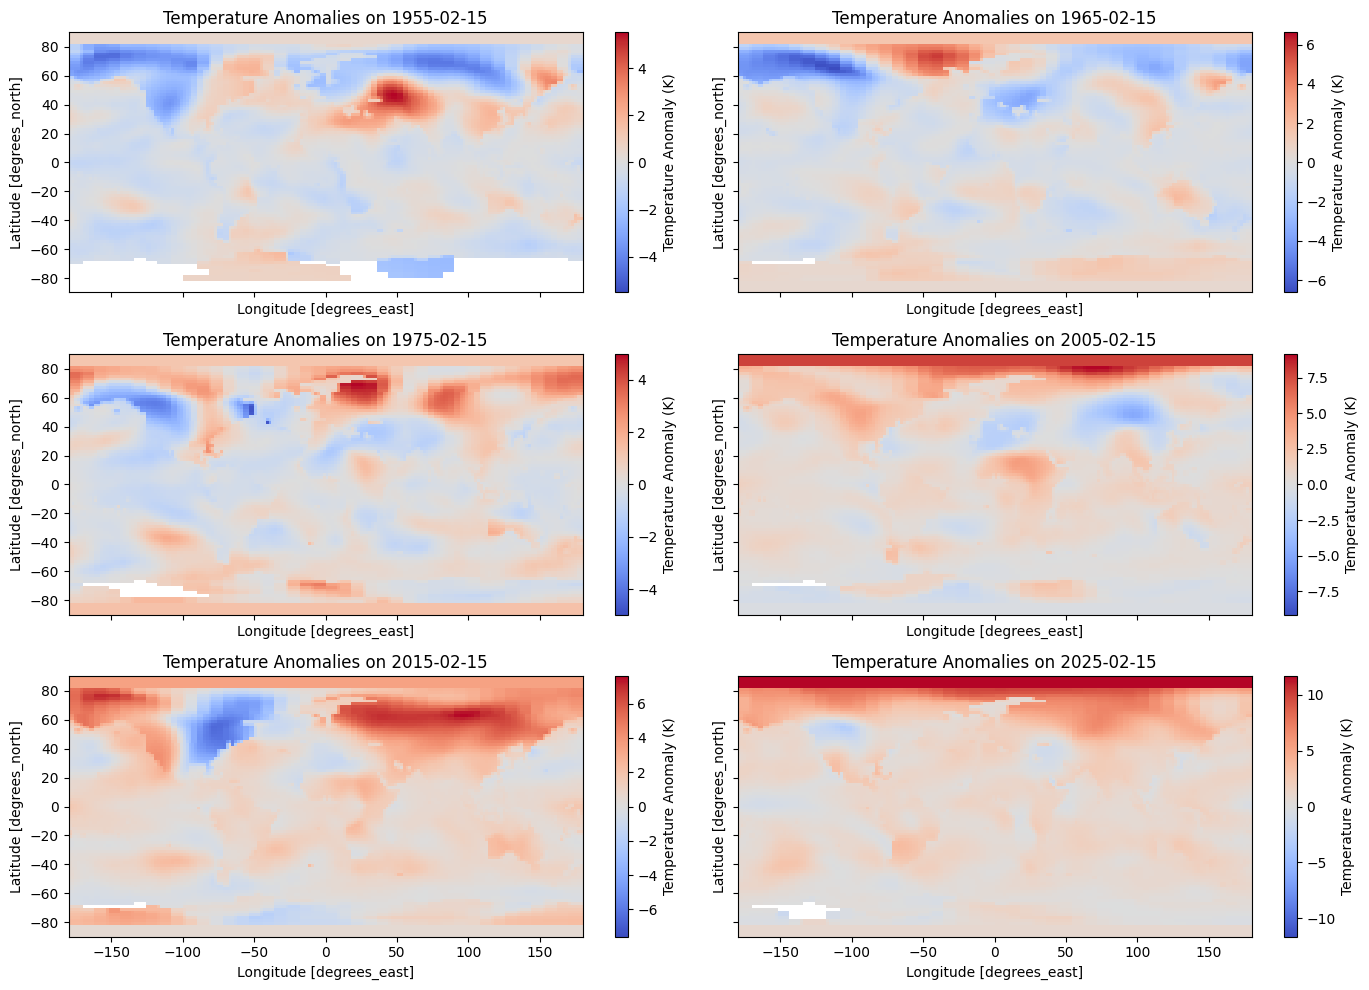

In [39]:
import matplotlib.pyplot as plt

time_indices = ['1955-02-15', '1965-02-15', '1975-02-15', '2005-02-15','2015-02-15','2025-02-15']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, time_index in enumerate(time_indices):
    ax = axes[i]
    tempanamoly.sel(time=time_index).plot(
        ax=ax,
        cmap='coolwarm',
        cbar_kwargs={'label': 'Temperature Anomaly (K)'}
    )
    ax.set_title(f'Temperature Anomalies on {time_index}')

plt.tight_layout()
plt.show()


### TempAnamoly (Temperature Anamoly): 

Temperature Anamoly is a crucial measure in climate studies. It is a factor derived by taking average of temperature for 30 or more years and keep the metric as baseline, then the deviation of temperature from the baseline is called TempAnamoly.

Positive value indicates warmer climate. Negative value indicates cooler climate.

Weights are crucial when dealing with global temp anamolies. 
Reason: latitude is 90 degrees at poles and shrinken coming towartempanamoly equator and becomes 0. So every grid 

In [40]:
weights = np.cos(np.deg2rad(tempanamoly.lat))
global_avg_temp_anomalies = tempanamoly.weighted(weights).mean(('lat', 'lon'))
global_avg_temp_anomalies

<xarray.DataArray 'tempanomaly' (time: 1742)> Size: 7kB
array([-0.19968231, -0.28825957, -0.11822996, ...,  1.2747678 ,
        1.3763037 ,  1.2720985 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-02-15

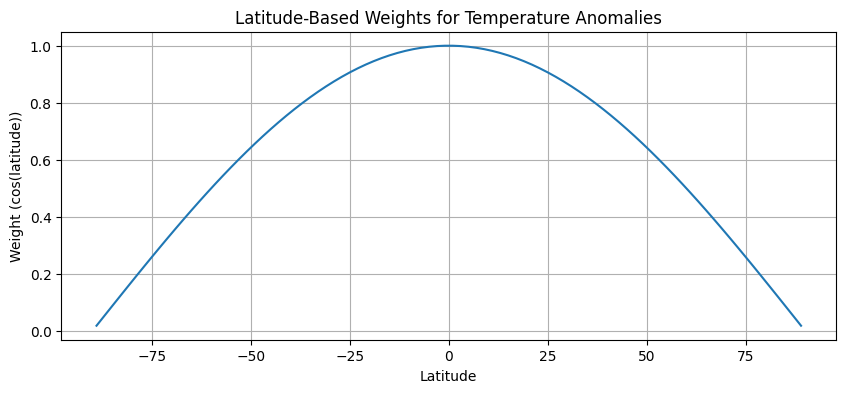

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (10, 4))
plt.plot(tempanamoly.lat, weights,)
plt.xlabel('Latitude')
plt.ylabel('Weight (cos(latitude))')
plt.title('Latitude-Based Weights for Temperature Anomalies')
plt.grid(True)
plt.show()

Analysis: Here we can see how the weights are peak at 0 degree that is at equator. moving left and right from equatore it start shrink and at the poles it became 0. 

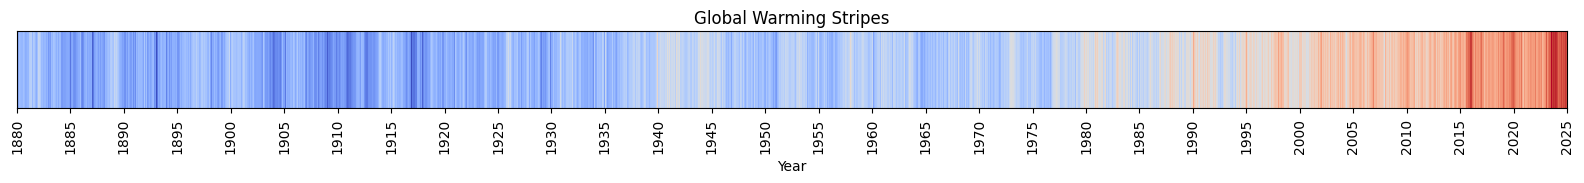

In [42]:
global_avg_df = global_avg_temp_anomalies.to_dataframe(name='temp_anomaly')
fig, ax = plt.subplots(1, 1, figsize = (20, 1))
years = global_avg_df.index.year
extent = [years.min(), years.max(), 0, 1]
plt.imshow(global_avg_df.T, aspect='auto', cmap='coolwarm', interpolation='none',extent=extent)
tick_positions = range(years.min(), years.max()+1 , 5)
plt.gca().set_xticks(tick_positions)
plt.gca().set_xticklabels(tick_positions, rotation=90)
plt.gca().set_yticks([])
plt.xlabel('Year')
plt.title('Global Warming Stripes')
plt.show()

Analysis: This image shows as a highlevel understanding on climate change. By looking at this immediately we can say climate change happening.

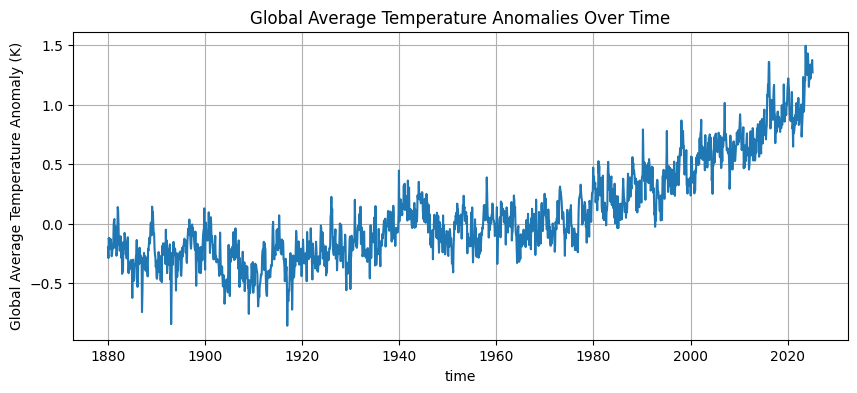

In [43]:
global_avg_temp_anomalies.plot(figsize=(10,4))
plt.ylabel('Global Average Temperature Anomaly (K)')
plt.title('Global Average Temperature Anomalies Over Time')
plt.grid(True)
plt.show()

Analysis: On 1880 the global temperature recorded in negative (cooler). But recently the temperature touched 1.5. It is the proof for the earth moving towards is death

### Analysis for specific regions.

#### Northen Hemisphere

<xarray.DataArray 'tempanomaly' (time: 1742)> Size: 7kB
array([-0.38455808, -0.61470205, -0.29376963, ...,  1.7332839 ,
        1.8648872 ,  1.6711584 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-02-15


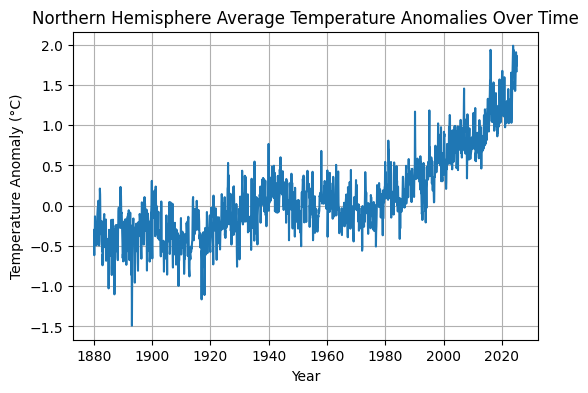

In [44]:
northern_hemisphere = tempanamoly.sel(lat=slice(0, 90))
nh_avg_temp_anomalies = northern_hemisphere.weighted(np.cos(np.deg2rad(northern_hemisphere.lat))).mean(('lat', 'lon'))
print(nh_avg_temp_anomalies)
plt.figure(figsize=(6,4))
nh_avg_temp_anomalies.plot()
plt.title('Northern Hemisphere Average Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


Analysis. Just by considerinng the northen hemisphere alone we can see the temperature grown near 2 degree celcius.

#### India

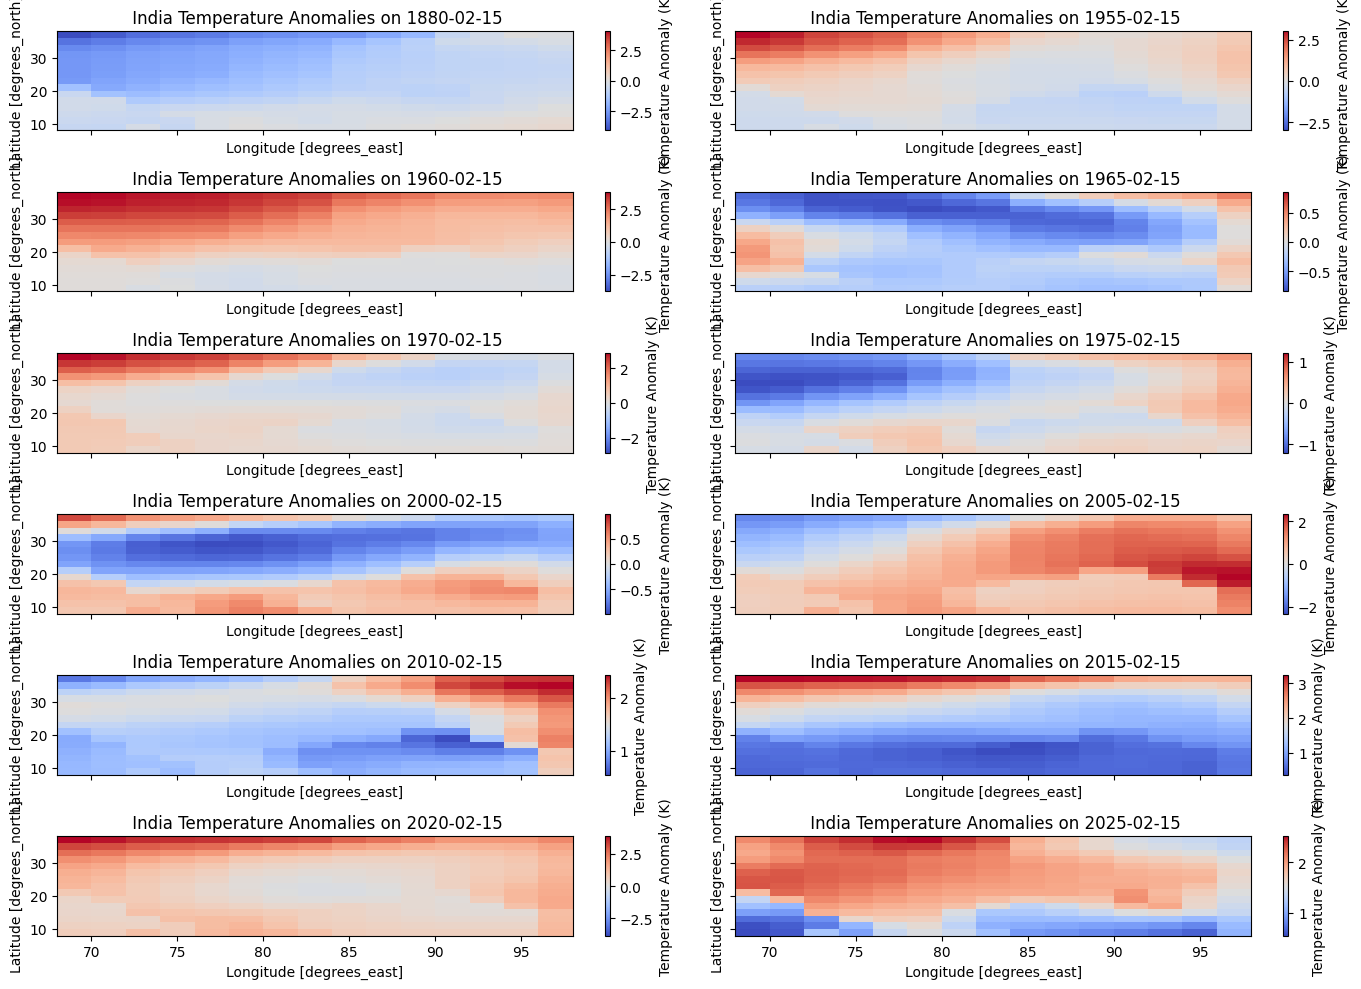

In [45]:
india_lat_range = slice(8.4, 37.6)
india_lon_range = slice(68.7, 97.25)

india_temp_anomalies = tempanamoly.sel(lat=india_lat_range, lon=india_lon_range)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()
time_indices = ['1880-02-15','1955-02-15','1960-02-15', '1965-02-15', '1970-02-15','1975-02-15','2000-02-15', '2005-02-15','2010-02-15','2015-02-15','2020-02-15','2025-02-15']
for i, time_index in enumerate(time_indices):
    ax = axes[i]
    india_temp_anomalies.sel(time =time_index).plot(
        ax=ax,
        cmap='coolwarm',
        cbar_kwargs={'label': 'Temperature Anomaly (K)'}
    )
    ax.set_title(f' India Temperature Anomalies on {time_index}')

plt.tight_layout()
plt.show()


Analysis: I realised that, ploting temperature for specific set of years will not open the window for right view. So with these plots we cannot say global warming is not happening, because for every year temperature can get affect by different causes. So this ain't going to give the clear cut

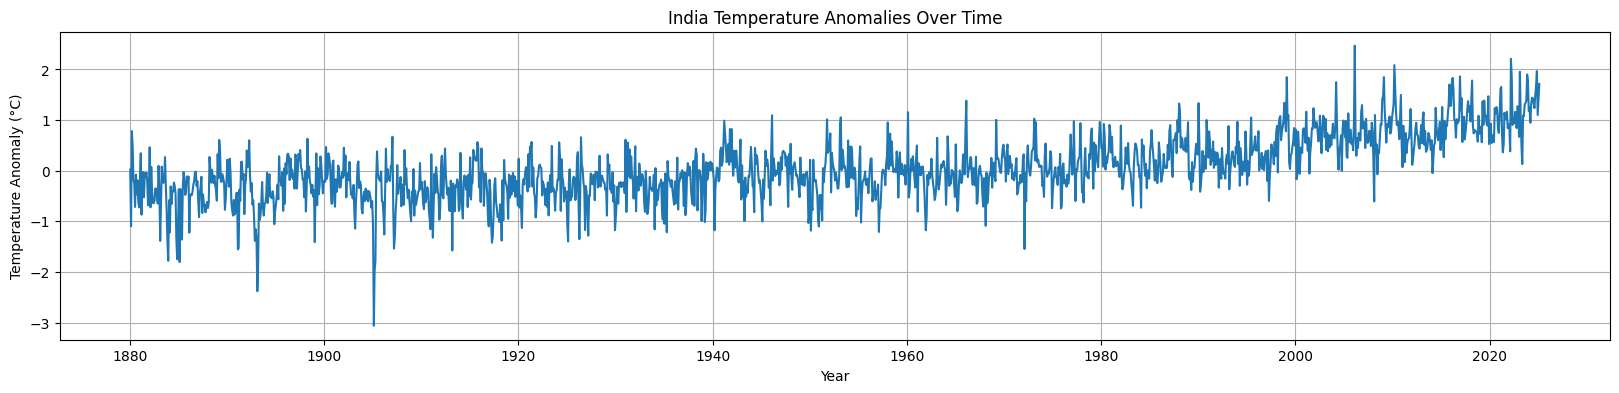

In [46]:
india_lat_range = slice(8.4, 37.6)
india_lon_range = slice(68.7, 97.25)

india_temp_anomalies = tempanamoly.sel(lat=india_lat_range, lon=india_lon_range)
india_avg_temp_anomalies = india_temp_anomalies.weighted(np.cos(np.deg2rad(india_temp_anomalies.lat))).mean(('lat', 'lon'))

plt.figure(figsize=(20, 4))
india_avg_temp_anomalies.plot()
plt.title('India Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

Analysis: India Slowly, steadily and successfully reached 2 degree celcius. Ofcourse India is a warmer country, and we can think 2 degree celcius is not a big deal. 
#### 2024 Heatwave: India experienced a severe heatwave in 2024, with temperatures reaching up to 50.5°C in Churu, Rajasthan. This extreme heat resulted in at least 219 deaths and over 25,000 cases of heatstroke. Between 2000 and 2019, India saw a significant increase in heat-related deaths, with an estimated 83,700 fatalities annually attributed to high temperatures.

### Year by Year Analysis

Yearly Average Global Temperature

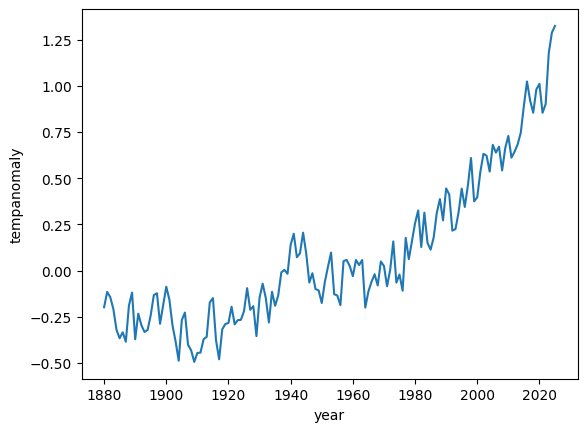

In [48]:
yearly_avg_temp_anomalies = global_avg_temp_anomalies.groupby('time.year').mean()
yearly_avg_temp_anomalies.plot()

Analysis: Previously we saw monthly plot, this is yearly plot. This is more clean and clear to vew the change.

Global Year over year change

In [49]:
yearly_avg_temp_anomalies_df = yearly_avg_temp_anomalies.to_dataframe(name="temp_anomaly")
decadal_avg_temp = yearly_avg_temp_anomalies_df.groupby((yearly_avg_temp_anomalies_df.index // 10) * 10).mean()
decadal_avg_temp['decade_change'] = decadal_avg_temp['temp_anomaly'].diff()

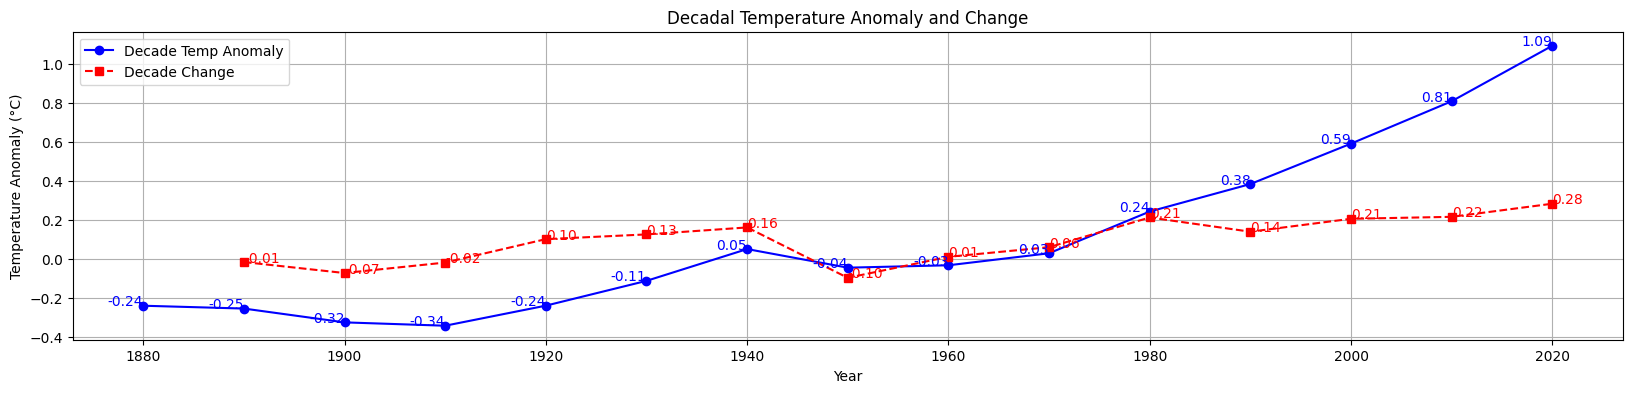

In [50]:
plt.figure(figsize=(20, 4))
plt.plot(decadal_avg_temp.index, decadal_avg_temp["temp_anomaly"], label="Decade Temp Anomaly", color='b', marker='o')
plt.plot(decadal_avg_temp.index, decadal_avg_temp["decade_change"], label="Decade Change", color='r', linestyle="dashed", marker='s')
for x, y in zip(decadal_avg_temp.index, decadal_avg_temp["temp_anomaly"]):
    plt.text(x, y, f"{y:.2f}", fontsize=10, ha='right', color='b')
for x, y in zip(decadal_avg_temp.index, decadal_avg_temp["decade_change"]):
    plt.text(x, y, f"{y:.2f}", fontsize=10, ha='left', color='r')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Decadal Temperature Anomaly and Change")
plt.legend()
plt.grid(True)
plt.show()

Analysis: Decade Temp Anomaly says the pattern of increase in temperature for decade over decade.
In other hand Decadal change says that in which range temperature is increasnig over every decade.

# Data Wrangling

### Checking for Missing Data

In [51]:
total_values = tempanamoly.size  # Total data points
missing_values = tempanamoly.isnull().sum().item()  # Count of null values
missing_percentage = (missing_values / total_values) * 100
print(f"Total Values: {total_values} Missing Values: {missing_values} Missing Data Percentage: {missing_percentage:.2f}%")


Total Values: 28220400 Missing Values: 3098087 Missing Data Percentage: 10.98%


### Pattern of Missing Values

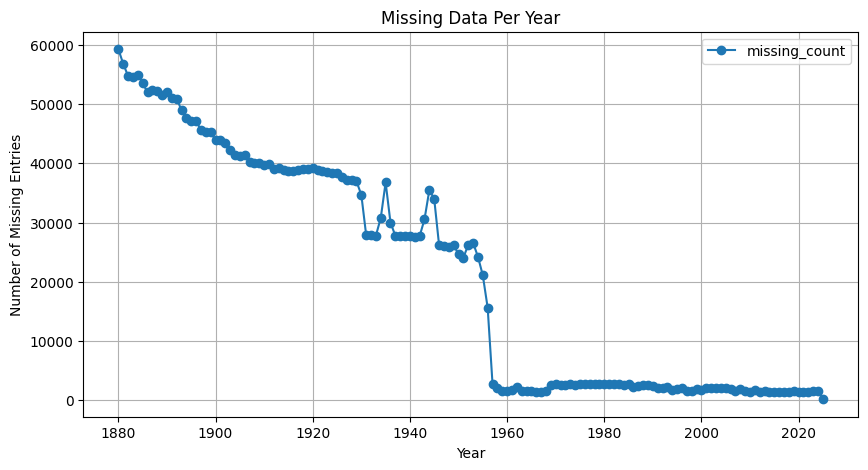

In [52]:
missing_by_year = tempanamoly.isnull().sum(dim=['lat', 'lon'])
missing_by_year = missing_by_year.groupby('time.year').sum().to_dataframe(name="missing_count")
missing_by_year.plot(figsize=(10, 5), marker='o', title="Missing Data Per Year")
plt.ylabel("Number of Missing Entries")
plt.xlabel("Year")
plt.grid()
plt.show()


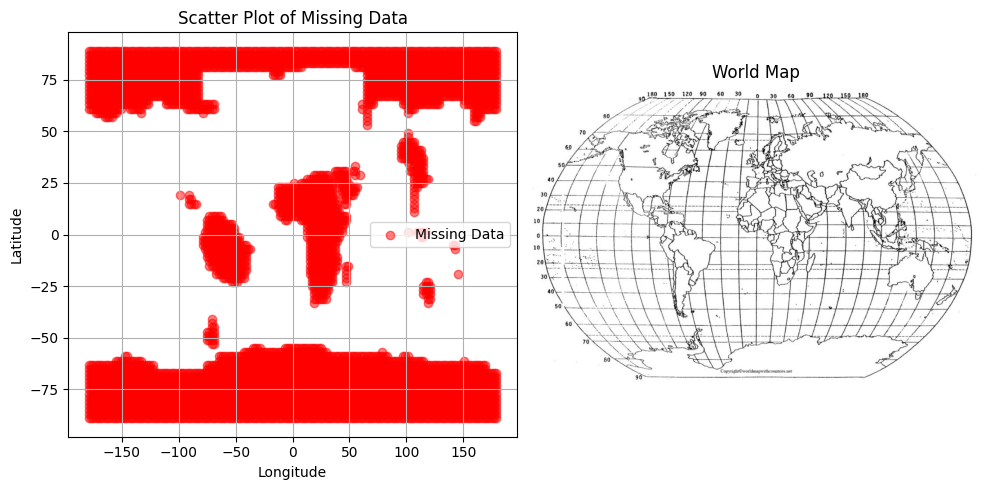

In [ ]:

# Compute missing data mask (True where there is at least one missing value over time)
missing_mask = tempanamoly.isnull().mean(dim='time') > 0  

# Extract latitude and longitude values
latitudes = tempanamoly.lat.values
longitudes = tempanamoly.lon.values

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes, indexing='xy')  

# Filter only missing data points
missing_lats = lat_grid[missing_mask]
missing_lons = lon_grid[missing_mask]


# Load the image
image = Image.open("Helpers/map-of-world-with-latitude-and-longitude-1024x679.webp")

# Plot scatter plot of missing values
fig,ax =plt.subplots(1,2,figsize=(10, 5))
ax[0].scatter(missing_lons, missing_lats, color='red', marker='o', alpha=0.5, label="Missing Data")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].set_title("Scatter Plot of Missing Data")
ax[0].legend()
ax[0].grid(True)

# Plot the world map image
ax[1].imshow(image)
ax[1].axis("off")  # Hide axis
ax[1].set_title("World Map")

plt.tight_layout()  
plt.show()

Analysis: <br> Missing Data Over Oceans & Polar Regions<br>
The red points in the far north (Arctic) and south (Antarctica) indicate that temperature anomaly data is missing in these regions.
This is common because historical climate data is sparse in polar regions (due to lack of weather stations before satellite data).

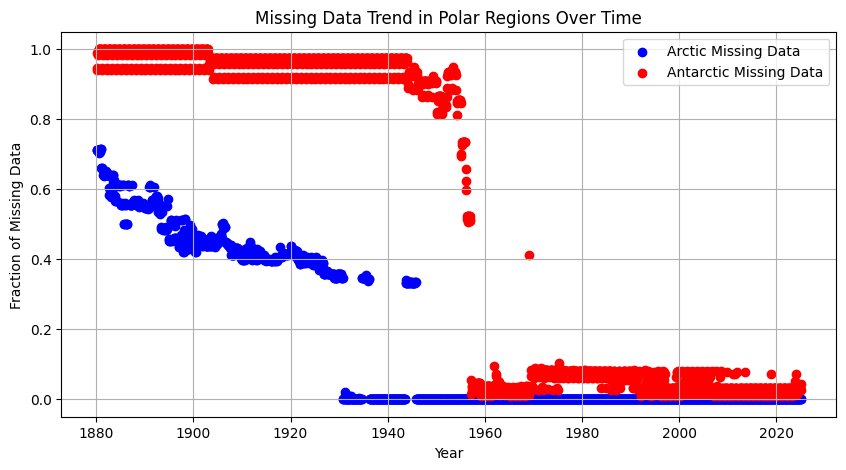

In [57]:
arctic_missing = tempanamoly.sel(lat=slice(66.5, 90)).isnull().mean(dim=['lat', 'lon'])
antarctic_missing = tempanamoly.sel(lat=slice(-90, -66.5)).isnull().mean(dim=['lat', 'lon'])

plt.figure(figsize=(10, 5))
plt.scatter(arctic_missing['time'], arctic_missing, label="Arctic Missing Data", color="blue")
plt.scatter(antarctic_missing['time'], antarctic_missing, label="Antarctic Missing Data", color="red")

plt.xlabel("Year")
plt.ylabel("Fraction of Missing Data")
plt.title("Missing Data Trend in Polar Regions Over Time")
plt.legend()
plt.grid(True)
plt.show()

Analysis: Here we can see most of the missing data are before 1960. That means we can confirm that these missing values are due to lack of whether stations or technology.

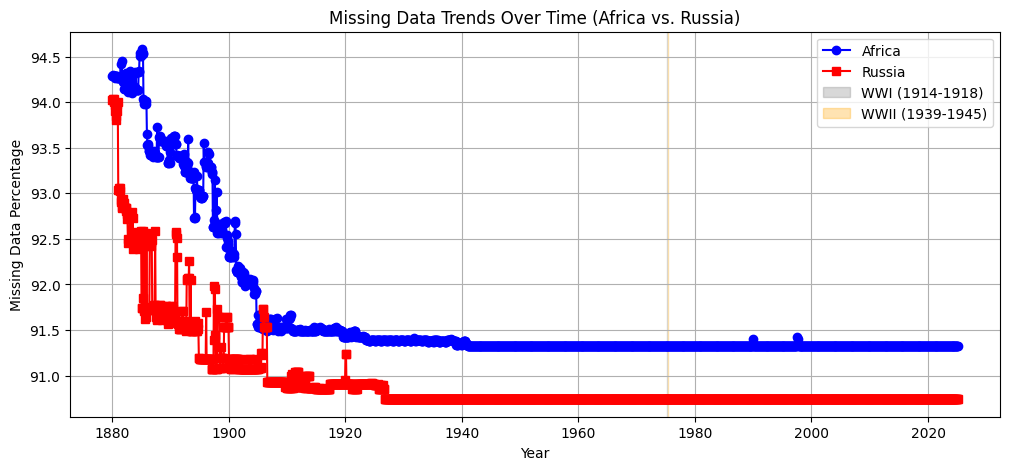

In [58]:
# Define lat/lon ranges for Africa and Russia
africa_lat_range = (-35, 37)  # Approximate lat range of Africa
africa_lon_range = (-20, 55)  # Approximate lon range of Africa

russia_lat_range = (40, 80)   # Approximate lat range of Russia
russia_lon_range = (30, 180)  # Approximate lon range of Russia

# Filter missing data only for Africa
africa_mask = (tempanamoly.lat >= africa_lat_range[0]) & (tempanamoly.lat <= africa_lat_range[1]) & \
              (tempanamoly.lon >= africa_lon_range[0]) & (tempanamoly.lon <= africa_lon_range[1])
africa_missing = tempanamoly.where(africa_mask).isnull().mean(dim=['lat', 'lon']) * 100

# Filter missing data only for Russia
russia_mask = (tempanamoly.lat >= russia_lat_range[0]) & (tempanamoly.lat <= russia_lat_range[1]) & \
              (tempanamoly.lon >= russia_lon_range[0]) & (tempanamoly.lon <= russia_lon_range[1])
russia_missing = tempanamoly.where(russia_mask).isnull().mean(dim=['lat', 'lon']) * 100

# Convert to Pandas DataFrame for easy plotting
africa_df = africa_missing.to_dataframe(name="Africa Missing %")
russia_df = russia_missing.to_dataframe(name="Russia Missing %")

# Plot missing data trends for Africa & Russia
plt.figure(figsize=(12, 5))
plt.plot(africa_df.index, africa_df["Africa Missing %"], marker='o', linestyle='-', color='b', label="Africa")
plt.plot(russia_df.index, russia_df["Russia Missing %"], marker='s', linestyle='-', color='r', label="Russia")

# Highlight World War periods
plt.axvspan(1914, 1918, color='gray', alpha=0.3, label="WWI (1914-1918)")
plt.axvspan(1939, 1945, color='orange', alpha=0.3, label="WWII (1939-1945)")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Missing Data Percentage")
plt.title("Missing Data Trends Over Time (Africa vs. Russia)")
plt.legend()
plt.grid(True)

plt.show()


![Alt text](Helpers/image.png)

# Handling Missing Values

### Interpolation

In [61]:
tempanamoly_masked = tempanamoly.interpolate_na(dim='time', method='spline', order=3)

Interpolated the missing values using spline method.

In [62]:
total_values = tempanamoly_masked.size  # Total data points
missing_values = tempanamoly_masked.isnull().sum().item()  # Count of null values
missing_percentage = (missing_values / total_values) * 100
print(f"Total Values: {total_values} Missing Values: {missing_values} Missing Data Percentage: {missing_percentage:.2f}%")


Total Values: 28220400 Missing Values: 38324 Missing Data Percentage: 0.14%


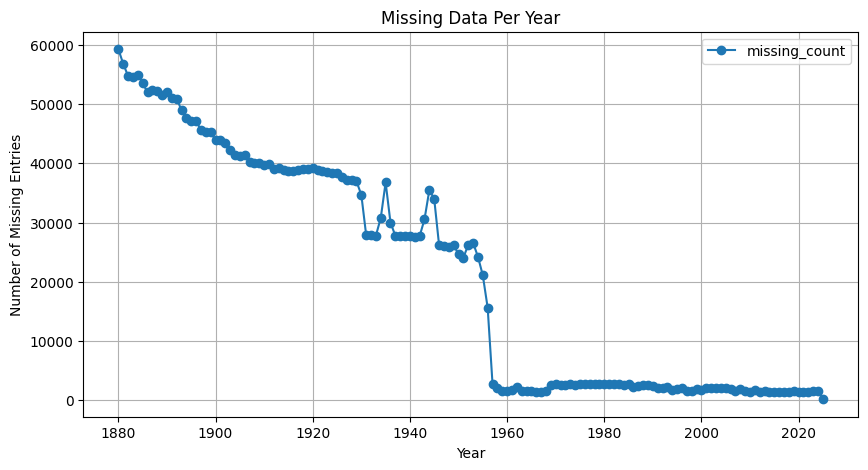

In [63]:
missing_by_year = tempanamoly.isnull().sum(dim=['lat', 'lon'])
missing_by_year = missing_by_year.groupby('time.year').sum().to_dataframe(name="missing_count")
missing_by_year.plot(figsize=(10, 5), marker='o', title="Missing Data Per Year")
plt.ylabel("Number of Missing Entries")
plt.xlabel("Year")
plt.grid()
plt.show()


Still there are missing values. Before going onto next step. let's plot the data wether the imputation is meaningful

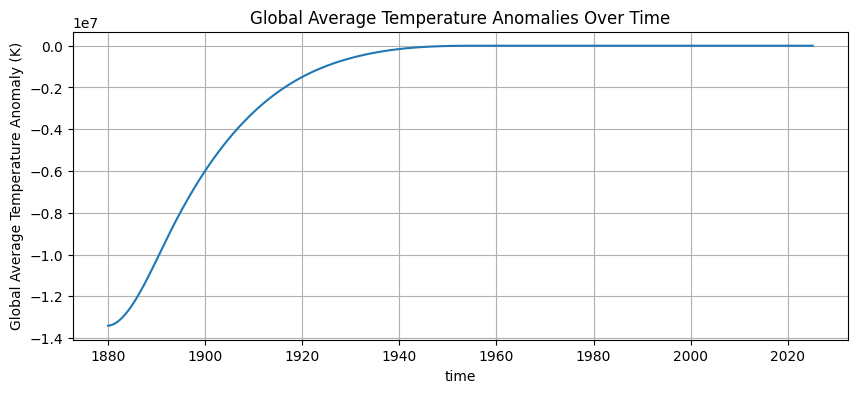

In [66]:
weights = np.cos(np.deg2rad(tempanamoly_masked.lat))
global_avg_temp_anomalies = tempanamoly_masked.weighted(weights).mean(('lat', 'lon'))
global_avg_temp_anomalies.plot(figsize=(10,4))
plt.ylabel('Global Average Temperature Anomaly (K)')
plt.title('Global Average Temperature Anomalies Over Time')
plt.grid(True)
plt.show()


Oh noooo!! The data is completely awfull. It is not expected. The spline interpolation not worked well. Lets try another method

### Trying EM (Expectation Maximization) with ridge regression and gcv (Generalised Cross Validation) to impute missing values.

In [64]:
# this funciton return a data by filling all the missing values with its column mean which we can use further for EM
def initialize_missing(temp_data):
    data_filled = temp_data.copy()
    col_means = np.nanmean(temp_data, axis=0)
    inds = np.where(np.isnan(temp_data))
    data_filled[inds] = np.take(col_means, inds[1])
    return data_filled

In [65]:
# We are using EM with Ridge because I don't want to impute missing values by overfitting

def fit_ridge_with_gcv(X, y):
    alphas = np.logspace(-4, 2, 30)  
    model = RidgeCV(alphas=alphas, store_cv_values=True)
    model.fit(X, y)
    return model


In [ ]:
def em_ridge_imputation(temp_data, max_iter=50, tol=1e-3):
    data_filled = initialize_missing(temp_data) # now we have data filled with its column mean
    mask = np.isnan(temp_data)

    for iteration in range(max_iter):
        prev = data_filled.copy()
        total_rows = temp_data.shape[0]
        for i in range(total_rows):
            print(f"Processing row {i+1} of {total_rows}")
            observed = ~mask[i]
            if observed.sum() < 2:
                continue 

            X = data_filled[:, observed].T  
            y = temp_data[i, observed]     

            model = fit_ridge_with_gcv(X, y)
            missing = mask[i]

            if missing.any():
                X_pred = data_filled[:, missing].T
                if np.isnan(X_pred).any():
                    continue 
                data_filled[i, missing] = model.predict(X_pred)

        diff = np.nanmean((data_filled - prev)**2)
        if diff < tol:
            break

    return data_filled


In [ ]:
tempanamoly_reshaped = tempanamoly.stack(location=("lat", "lon"))  

data_matrix = tempanamoly_reshaped.values

valid_locations_mask = ~np.isnan(data_matrix).all(axis=0)  
filtered_matrix = data_matrix[:, valid_locations_mask]    

filtered_locations = tempanamoly_reshaped.location[valid_locations_mask]

imputed_matrix = em_ridge_imputation(filtered_matrix) 

imputed_array = xr.DataArray(
    imputed_matrix,
    dims=("time", "location"),
    coords={
        "time": tempanamoly_reshaped.time,
        "location": filtered_locations
    }
)

unstacked = imputed_array.unstack("location") 
unstacked.to_netcdf("dataimputed.nc")

Successfully imputed using EM

In [68]:
unstacked = xr.open_dataset("preprocessed_files/dataimputed.nc").__xarray_dataarray_variable__
unstacked

<xarray.DataArray '__xarray_dataarray_variable__' (time: 1742, lat: 90, lon: 180)> Size: 113MB
[28220400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-02-15

In [3]:
total_values = unstacked.size  # Total data points
missing_values = unstacked.isnull().sum().item()  # Count of null values
missing_percentage = (missing_values / total_values) * 100
print(f"Total Values: {total_values} Missing Values: {missing_values} Missing Data Percentage: {missing_percentage:.2f}%")


Total Values: 28220400 Missing Values: 38324 Missing Data Percentage: 0.14%


Shocked, still there are some missing values. <br> since we are using interpolation to fill the missing values, there could be some missing data that don't even have previous and forward date values to fill the missing data. that's why they are still missing. So let's check what are all the years the data is missing. 

But lets plot the data, whether the imputation is well.

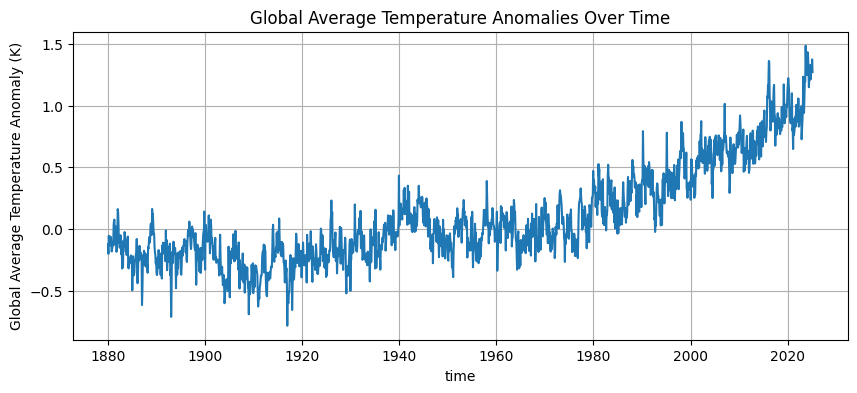

In [69]:
weights = np.cos(np.deg2rad(unstacked.lat))
global_avg_temp_anomalies = unstacked.weighted(weights).mean(('lat', 'lon'))
global_avg_temp_anomalies
global_avg_temp_anomalies.plot(figsize=(10,4))
plt.ylabel('Global Average Temperature Anomaly (K)')
plt.title('Global Average Temperature Anomalies Over Time')
plt.grid(True)
plt.show()

Wow, great it worked well with the data.

Why 0.14% data is missing... Here is the details

### After Imputation

![Alt text](Helpers/non_imputed_locations_.png)


Look at the marked area.. for all the timestamps we don't have any information about that location. That is the reason we are not able to impute. <br> since we are imputing with lat and lon mean for the time stamps

So I going to try to try to impute those values using nearby lat and lon values

In [4]:
stacked = unstacked.stack(location=("lat","lon"))
stacked = stacked.transpose("location", "time")
all_nan_mask = stacked.isnull().all(dim="time") #filter the  locations having nan all over the time
valid = stacked.sel(location=~all_nan_mask) #seperating non nan values
missing = stacked.sel(location=all_nan_mask) #seperating nan values


In [ ]:

valid_locs = valid.location.to_index()
missing_locs = missing.location.to_index()

tree = cKDTree(np.array(valid_locs.tolist()))
_, indices = tree.query(np.array(missing_locs.tolist()), k=1)

imputed_missing_values = valid.values[indices]

imputed_missing = xr.DataArray(
    imputed_missing_values,
    dims=missing.dims,
    coords=missing.coords
)
combined = xr.concat([valid, imputed_missing], dim="location")
combined = combined.sortby("location")  # optional, sort to original order
all_imputed = combined.unstack("location")



In [71]:
total_values = all_imputed.size  # Total data points
missing_values = all_imputed.isnull().sum().item()  # Count of null values
missing_percentage = (missing_values / total_values) * 100
print(f"Total Values: {total_values} Missing Values: {missing_values} Missing Data Percentage: {missing_percentage:.2f}%")


Total Values: 28220400 Missing Values: 0 Missing Data Percentage: 0.00%


Wow finally we are moving to prediction. Below is the image of all imputed ds.

![Alt text](Helpers/all_imputed.png)

# Prediction

## Predicting global surface temp_anamoly

In [ ]:
all_imputed = xr.open_dataset('preprocessed_files/All_imputed.nc').__xarray_dataarray_variable__

In [ ]:
global_avg_temp_anomalies = all_imputed.mean(dim=["lat","lon"])
global_temp_df = global_avg_temp_anomalies.to_dataframe(name="Global_Temp").reset_index()
global_temp_df.to_csv('preprocessed_files/global_temp_df.csv')

## Base Line Model

Base line model is very important when we are going to test many models. This going to be the comparision model. It will set a bench mark for the advanced models. If any model's mae and rmse value less than the base model, we will select it as best model

📉 Baseline MAE: 0.2796
📉 Baseline RMSE: 0.3576


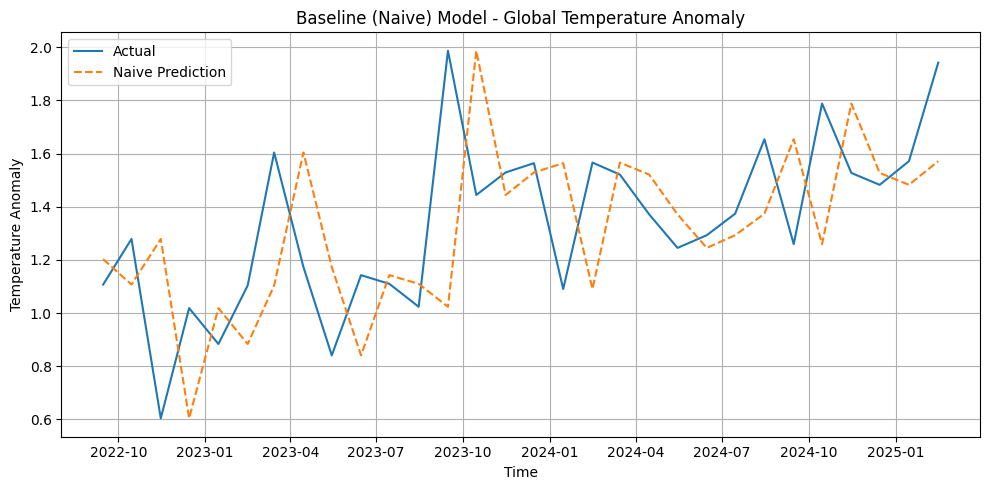

In [ ]:
# Sort by time just in case
global_temp_df = global_temp_df.sort_values("time").reset_index(drop=True)

# Use last 60 months for testing
window = 30
y_test = global_temp_df["Global_Temp"].iloc[-window:].values

# Naive prediction: each month is predicted as the previous one
y_pred = global_temp_df["Global_Temp"].iloc[-window-1:-1].values

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📉 Baseline MAE: {mae:.4f}")
print(f"📉 Baseline RMSE: {rmse:.4f}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(global_temp_df["time"].iloc[-window:], y_test, label="Actual")
plt.plot(global_temp_df["time"].iloc[-window:], y_pred, label="Naive Prediction", linestyle="--")
plt.title("Baseline (Naive) Model - Global Temperature Anomaly")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Prophet forecaster - Facebook/meta

In [ ]:
from prophet import Prophet

In [72]:
# train and test split
train = global_temp_df[:-24] 
test = global_temp_df[-24:]  
train.shape, test.shape

((1718, 2), (24, 2))

In [ ]:
train_prophet = train.rename(columns={"time": "ds", "Global_Temp": "y"})
model = Prophet()
model.fit(train_prophet)

Importing plotly failed. Interactive plots will not work.
11:46:11 - cmdstanpy - INFO - Chain [1] start processing
11:46:12 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = model.make_future_dataframe(periods=24, freq="M")  # same as test length
forecast = model.predict(future)
forecast.shape

(1742, 16)

In [9]:
forecast_df = forecast[["ds", "yhat"]].sort_values("ds")
test_df = test[["time", "Global_Temp"]].sort_values("time").rename(columns={"time": "ds"})

comparison = pd.merge_asof(test_df, forecast_df, on="ds", direction="nearest")

comparison = comparison.dropna()

mae = mean_absolute_error(comparison["Global_Temp"], comparison["yhat"])
rmse = np.sqrt(mean_squared_error(comparison["Global_Temp"], comparison["yhat"]))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 0.3057
RMSE: 0.3610


It is higher than the benchmark

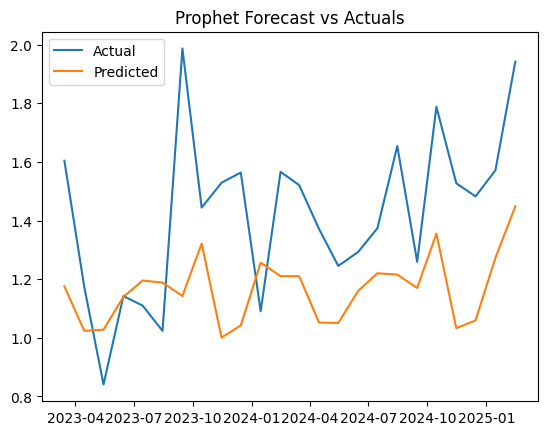

In [10]:
plt.plot(comparison["ds"], comparison["Global_Temp"], label="Actual")
plt.plot(comparison["ds"], comparison["yhat"], label="Predicted")
plt.legend()
plt.title("Prophet Forecast vs Actuals")
plt.show()


It is not well captured the trend in th data

### LSTM

In [ ]:
global_temp_df = global_temp_df.sort_values("time")


In [8]:
# Normalize temperature
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(global_temp_df[["Global_Temp"]])

In [60]:
# Create sequences for LSTM
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

22
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
Window: 22 → MAE: 0.2187, RMSE: 0.2811
24
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Window: 24 → MAE: 0.2147, RMSE: 0.2779
26
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Window: 26 → MAE: 0.2043, RMSE: 0.2704
28
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
Window: 28 → MAE: 0.2227, RMSE: 0.2857
30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Window: 30 → MAE: 0.2227, RMSE: 0.2864
32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Window: 32 → MAE: 0.2017, RMSE: 0.2702
34
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Window: 34 → MAE: 0.2379, RMSE: 0.3006
36
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step
Window: 36 → MAE: 0.6834, RMSE: 0.7501

✅ Best model → Window size: 32, RMSE: 0.2702


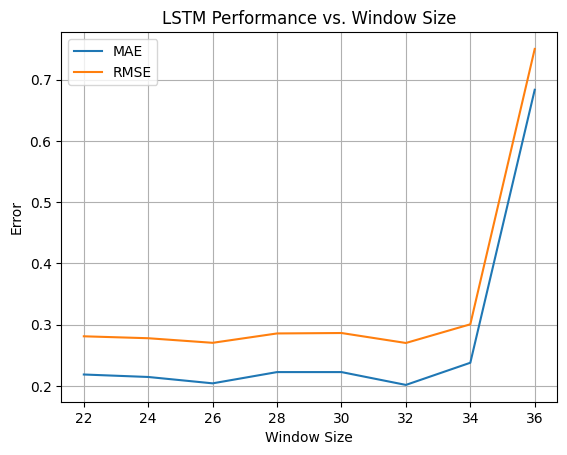

In [65]:
best_rmse = float("inf")
best_model = None
best_window = None
results = []

for window_size in range(22,37,2):
    # 1. Create sequences
    X, y = create_sequences(scaled_temp, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # 2. Train-test split (last 60 months)
    split_index = len(X) - 60
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # 3. Build & train model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

    # 4. Predict
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # 5. Evaluate
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    results.append((window_size, mae, rmse))

    print(f"Window: {window_size} → MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    # 6. Save the best model
    if rmse < best_rmse:
        best_rmse = rmse
        best_window = window_size
        best_model = model

# Output best info
print(f"\n Best model → Window size: {best_window}, RMSE: {best_rmse:.4f}")

# Optional: Plot all performances
window_sizes, maes, rmses = zip(*results)
plt.plot(window_sizes, maes, label='MAE')
plt.plot(window_sizes, rmses, label='RMSE')
plt.xlabel("Window Size")
plt.ylabel("Error")
plt.title("LSTM Performance vs. Window Size")
plt.legend()
plt.grid(True)
plt.show()


Wow it is better than basemodel

## RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(90, activation='tanh', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 90)             │         8,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,371 (32.70 KB)

 Trainable params: 8,371 (32.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0339 - val_loss: 0.0157
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - val_loss: 0.0121
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0066 - val_loss: 0.0119
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - val_loss: 0.0095
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - val_loss: 0.0135
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0094
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0105
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - val_loss: 0.0102
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - val_loss: 0.0099
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058 - val_loss: 0.0165
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 0.0127
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/st

## ARIMA and Seasonal ARIMA

In [ ]:
global_temp_df = global_temp_df.set_index('time')

I see clearly there is no seasonality. But let's confirm it programattically..

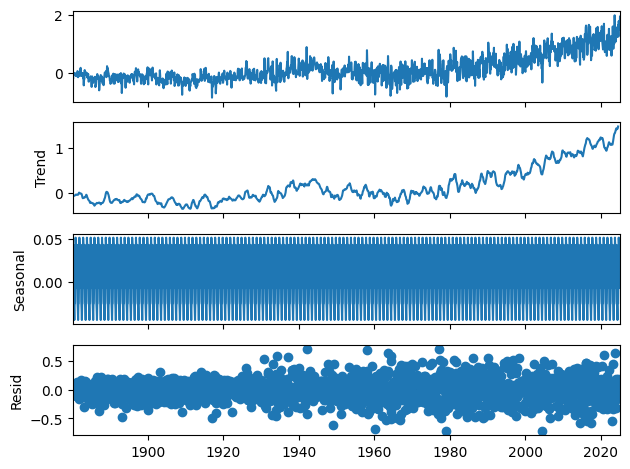

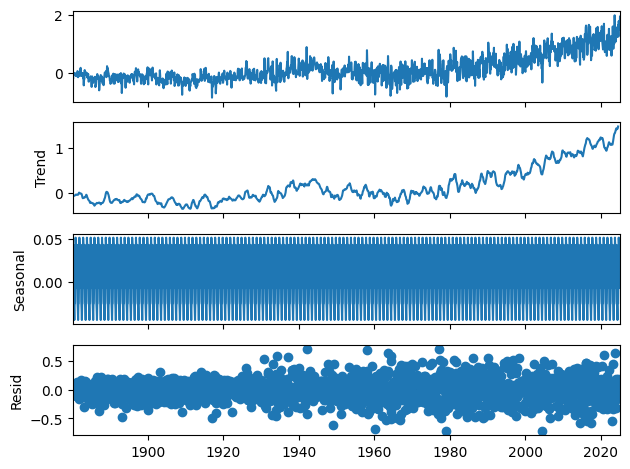

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(global_temp_df, model='additive', period=12)
result.plot()

We can see that, seasonal bar is completely noise which is not shown any pattern of sesonality, so we stick with ARIMA instead of Seasonal ARIMA

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(train, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)

model.fit(train)


In [54]:
forecast = model.predict(n_periods=len(test))
forecast = np.array(forecast).flatten()
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
# mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
# print(f"MAPE: {mape:.2f}%")


MAE: 0.355
RMSE: 0.429


c:\Users\karth\OneDrive\Desktop\Python\Projects\jupyter_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Here also not met the bench mark, even though we don't have sesonlity let's try seasonal arima model.

In [46]:
from pmdarima.arima import auto_arima

model = auto_arima(train, seasonal=True,m=12, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)

model.fit(train)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-493.308, Time=4.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=189.272, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-124.343, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-384.742, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=187.284, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-477.633, Time=4.33 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-476.096, Time=4.25 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-492.466, Time=11.64 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-486.507, Time=12.62 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-480.630, Time=1.80 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-486.393, Time=11.52 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-489.324, Time=19.38 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-493.936, Time=25.98 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=23.31 sec
 ARIMA(2,1,1)(2,0,2)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

AIC is Akaike Information Criterion. Which is a statistical metric. The more the value is less the more the parameter is a good fit.

In [52]:
forecast = model.predict(n_periods=len(test))
forecast = np.array(forecast).flatten()
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
# mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
# print(f"MAPE: {mape:.2f}%")


MAE: 0.348
RMSE: 0.411


c:\Users\karth\OneDrive\Desktop\Python\Projects\jupyter_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Even this model not met the benck mark

<Axes: title={'center': 'Actual + Forecast'}>

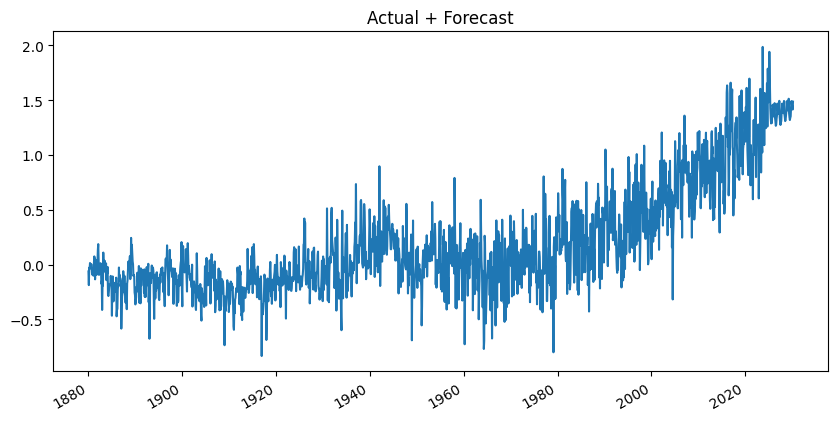

In [43]:
# Plot original + forecast together
combined = pd.concat([global_temp_df['Global_Temp'], forecast_df['Forecast']])
combined.plot(title="Actual + Forecast", figsize=(10, 5))


Finally let's conclude that lstm worked well and choose the lstm's best model as our predictor

In [ ]:
best_model.save('model/bestmodel.h5')
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']